In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:

URL="https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
#df=pd.read_csv(URL, low_memory=False) 
df=pd.read_csv(URL, low_memory=False)


In [10]:
df=df[df.country_region_code=='MX']
df['date'] =  pd.to_datetime(df['date'])
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,
2020-02-15,MX,Mexico,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,4.0,6.0,4.0,3.0,-1.0
2020-02-16,MX,Mexico,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,6.0,7.0,6.0,2.0,-1.0
2020-02-17,MX,Mexico,NaN,NaN,NaN,NaN,NaN,2020-02-17,2.0,4.0,3.0,5.0,11.0,-2.0
2020-02-18,MX,Mexico,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,3.0,2.0,9.0,-2.0
2020-02-19,MX,Mexico,NaN,NaN,NaN,NaN,NaN,2020-02-19,0.0,0.0,2.0,3.0,8.0,-1.0


In [11]:
df.shape

(9537, 14)

In [12]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9537 entries, 2020-02-15 to 2020-11-29
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 9537 non-null   object        
 1   country_region                                      9537 non-null   object        
 2   sub_region_1                                        9248 non-null   object        
 3   sub_region_2                                        0 non-null      object        
 4   metro_area                                          0 non-null      object        
 5   iso_3166_2_code                                     9248 non-null   object        
 6   census_fips_code                                    0 non-null      float64       
 7   date                                                9537 non-null   datetime64

country_region_code                                      0
country_region                                           0
sub_region_1                                           289
sub_region_2                                          9537
metro_area                                            9537
iso_3166_2_code                                        289
census_fips_code                                      9537
date                                                     0
retail_and_recreation_percent_change_from_baseline       0
grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                       0
transit_stations_percent_change_from_baseline          166
workplaces_percent_change_from_baseline                  0
residential_percent_change_from_baseline                 0
dtype: int64

In [13]:
df.drop('sub_region_2',1,inplace=True)


In [14]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head(63)) #The null values

list(df)

           sub_region_1 metro_area iso_3166_2_code  census_fips_code  \
date                                                                   
2020-02-15          NaN        NaN             NaN               NaN   
2020-02-16          NaN        NaN             NaN               NaN   
2020-02-17          NaN        NaN             NaN               NaN   
2020-02-18          NaN        NaN             NaN               NaN   
2020-02-19          NaN        NaN             NaN               NaN   
...                 ...        ...             ...               ...   
2020-04-13          NaN        NaN             NaN               NaN   
2020-04-14          NaN        NaN             NaN               NaN   
2020-04-15          NaN        NaN             NaN               NaN   
2020-04-16          NaN        NaN             NaN               NaN   
2020-04-17          NaN        NaN             NaN               NaN   

            transit_stations_percent_change_from_baseline  
dat

['country_region_code',
 'country_region',
 'sub_region_1',
 'metro_area',
 'iso_3166_2_code',
 'census_fips_code',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

In [15]:
df.rename(columns={'sub_region_1': 'Province',
                   'retail_and_recreation_percent_change_from_baseline': 'Retail_and_Recreation', 
                   'grocery_and_pharmacy_percent_change_from_baseline':'Grocery_and_Pharmacy', 
                   'parks_percent_change_from_baseline':'Parks',
                   'transit_stations_percent_change_from_baseline': 'Transit_Stations',
                   'workplaces_percent_change_from_baseline':'Workplaces',
                   'residential_percent_change_from_baseline': 'Residences',
                   'date':'Date'},inplace=True)
df=df[['Date',
       'Province',
 'Retail_and_Recreation',
 'Grocery_and_Pharmacy',
 'Parks',
 'Transit_Stations',
 'Workplaces',
 'Residences']]

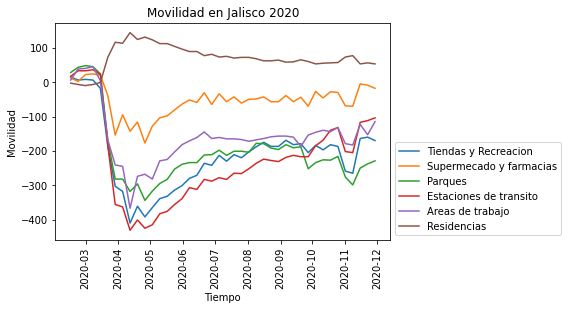

In [16]:
df_Jal = df[df.Province == 'Jalisco']
df_Jal_W = df_Jal.resample("W").sum()
fig,ax = plt.subplots()
ax.plot(df_Jal_W.index, df_Jal_W['Retail_and_Recreation'], label="Tiendas y Recreacion")
ax.plot(df_Jal_W.index, df_Jal_W['Grocery_and_Pharmacy'], label="Supermecado y farmacias")
ax.plot(df_Jal_W.index, df_Jal_W['Parks'], label="Parques")
ax.plot(df_Jal_W.index, df_Jal_W['Transit_Stations'], label="Estaciones de transito")
ax.plot(df_Jal_W.index, df_Jal_W['Workplaces'], label="Areas de trabajo")
ax.plot(df_Jal_W.index, df_Jal_W['Residences'], label="Residencias")
ax.set_ylabel("Movilidad")
ax.set_xlabel("Tiempo")
ax.set_title("Movilidad en Jalisco 2020")
plt.xticks(rotation='vertical')
ax.legend(loc="lower left", bbox_to_anchor=(1,0)) 
plt.show()